<h1 align="center"><font size="5">Comparison of venues around NFL Stadiums versus International Airports</font></h1>

Download dependencies

In [243]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
#import geocoder
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
import numpy as np
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from pandas import DataFrame
print('Libraries imported.')

Libraries imported.


Load and explore the data
This analysis compares the area around NFL Stadiums to International Airports in the US. 

NFL Stadiums: https://sites.google.com/site/32nflteamsabsoluteandrelative

In [244]:
tables3 = pd.read_html("https://github.com/mccarroo/Coursera_Capstone/blob/master/Teams.csv")
table3 = tables3[0]
df_stadium = pd.DataFrame(table3)
df_stadium = df_stadium[['Team', 'latitude', 'longitude']]
df_stadium.columns = ['Location','Latitude','Longitude']
df_stadium['Type'] = 'Stadium'
df_stadium.head()

,Location,Latitude,Longitude,Type
0,Titans,36.166461,-86.771289,Stadium
1,Giants,40.812194,-74.076983,Stadium
2,Steelers,40.446786,-80.015761,Stadium
3,Panthers,35.225808,-80.852861,Stadium
4,Ravens,39.277969,-76.622767,Stadium


International Airports: https://www.latlong.net/category/airports-236-19.html

In [245]:
tables5 = pd.read_html("https://github.com/mccarroo/Coursera_Capstone/blob/master/airport-codes.csv")
table5 = tables5[0]
df_airports2 = pd.DataFrame(table5)
df_airports2 = df_airports2[['Airport', 'Latitude', 'Longitude']]
df_airports2.columns = ['Location','Latitude','Longitude']
df_airports2['Type'] = 'Airport'
df_airports2.head()

,Location,Latitude,Longitude,Type
0,Albuquerque International Sunport,35.040199,-106.609001,Airport
1,Rick Husband Amarillo International Airport,35.219398,-101.706001,Airport
2,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,Airport
3,Austin Bergstrom International Airport,30.194500,-97.669899,Airport
4,Bradley International Airport,41.938900,-72.683197,Airport


Combine the list of Stadiums and Airports

In [246]:
df_total = df_stadium.append(df_airports2, ignore_index = True) 
df_total.head()
df_total.shape

(125, 4)

In [247]:
type = df_total['Type'].value_counts()
type = pd.DataFrame(type)

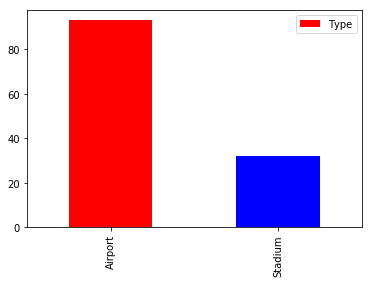

In [248]:
my_colors = 'rbgkymc' 
ax = type.plot(kind='bar',color=my_colors)

<h1 align="center"><font size="5">Generate a Map of the Stadiums and Airports</font></h1>
Identify the geographical location of the USA

In [249]:
address = 'USA'

geolocator = Nominatim(user_agent="usa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the USA are 39.7837304, -100.4458825.


Use Folium to create a map, marking Stadiums in Blue and Airports in Red

In [250]:
map_usa = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, label in zip(df_stadium['Latitude'], df_stadium['Longitude'], df_stadium['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_usa)  
    
for lat, lng, label in zip(df_airports2['Latitude'], df_airports2['Longitude'], df_airports2['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=False,
        fill_opacity=0.7,
        parse_html=False).add_to(map_usa)  
    
map_usa

Submit Foursquare Credentials

In [251]:
CLIENT_ID = 'NFYY1NJAH3LYPASIHPMBKBYPY2YZDKH2FPXSKI3VAOOFB3HE' # your Foursquare ID
CLIENT_SECRET = '1IUGRDYEBV2JSTRXWOJXWWYXDPCIEHG42STPJXWDI3P3Z2TO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NFYY1NJAH3LYPASIHPMBKBYPY2YZDKH2FPXSKI3VAOOFB3HE
CLIENT_SECRET:1IUGRDYEBV2JSTRXWOJXWWYXDPCIEHG42STPJXWDI3P3Z2TO


In [252]:
df_stadium.loc[0, 'Location']
location_latitude = df_total.loc[0, 'Latitude'] # neighborhood latitude value
location_longitude = df_total.loc[0, 'Longitude'] # neighborhood longitude value
location_type = df_total.loc[0, 'Type'] # neighborhood longitude value

location_name = df_total.loc[0, 'Location'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(location_name, 
                                                               location_latitude, 
                                                               location_longitude))

Latitude and longitude values of Titans are 36.166461, -86.771289.


In [253]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    location_latitude, 
    location_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NFYY1NJAH3LYPASIHPMBKBYPY2YZDKH2FPXSKI3VAOOFB3HE&client_secret=1IUGRDYEBV2JSTRXWOJXWWYXDPCIEHG42STPJXWDI3P3Z2TO&v=20180605&ll=36.166461,-86.771289&radius=500&limit=100'

In [254]:
# function that extracts the category and location of each venue
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [255]:
stadium_venues = getNearbyVenues(names=df_total['Location'],
                                   latitudes=df_total['Latitude'],
                                   longitudes=df_total['Longitude']
                                  )

Titans
Giants
Steelers
Panthers
Ravens
Buccaneers
Colts
Vikings
Cardinals
Cowboys
Falcons
Jets
Broncos
Dolphins
Eagles
Bears
Patriots
Redskins
Packers
Chargers
Saints
Texans
Bills
Forty-Niners
Jaguars
Browns
Raiders
Chiefs
Rams
Seahawks
Bengals
Lions
Albuquerque International Sunport
Rick Husband Amarillo International Airport
Hartsfield Jackson Atlanta International Airport
Austin Bergstrom International Airport
Bradley International Airport
Boeing Field King County International Airport
Bangor International Airport
Birmingham-Shuttlesworth International Airport
Billings Logan International Airport
Nashville International Airport
General Edward Lawrence Logan International Airport
Buffalo Niagara International Airport
Baltimore/Washington International Thurgood Marshall Airport
Charleston Air Force Base-International Airport
Cleveland Hopkins International Airport
Charlotte Douglas International Airport
John Glenn Columbus International Airport
Corpus Christi International Airport
Cin

In [256]:
stadium_venues.shape

(1977, 7)

In [257]:
print('There are {} uniques categories.'.format(len(stadium_venues['Venue Category'].unique())))

There are 238 uniques categories.


In [258]:
stadium_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Titans,36.166461,-86.771289,Nissan Stadium,36.166610,-86.771299,Football Stadium
1,Titans,36.166461,-86.771289,Titans Pro Shop,36.166845,-86.770072,Sporting Goods Shop
2,Titans,36.166461,-86.771289,Music City Bowl,36.166220,-86.771642,Football Stadium
3,Titans,36.166461,-86.771289,North Endzone,36.167020,-86.771635,Stadium
4,Titans,36.166461,-86.771289,Cumberland Park,36.162498,-86.770165,Park


Removed categories that would obviously identify a Stadium or Airport

In [259]:
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Football Stadium"]
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Stadium"]
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Athletics & Sports"]
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Airport"]
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Airport Service"]
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Airport Gate"]
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Airport Terminal"]
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Airport Lounge"]
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Duty-free Shop"]
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Airport Food Court"]
stadium_venues = stadium_venues[stadium_venues['Venue Category'] != "Rental Car Location"]

In [260]:
stadium_venues.shape

(1457, 7)

In [261]:
print('There are {} uniques categories after removing obvious categories.'.format(len(stadium_venues['Venue Category'].unique())))
print('There are {} uniques Venues after removing obvious categories.'.format(len(stadium_venues['Neighborhood'].unique())))

There are 227 uniques categories after removing obvious categories.
There are 94 uniques Venues after removing obvious categories.


<h1 align="center"><font size="5">Analyze Each Area</font></h1>

In [262]:
# one hot encoding
stadium_onehot = pd.get_dummies(stadium_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
stadium_onehot['Neighborhood'] = stadium_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [stadium_onehot.columns[-1]] + list(stadium_onehot.columns[:-1])
stadium_onehot = stadium_onehot[fixed_columns]

stadium_onehot.head()

,Neighborhood,ATM,Accessories Store,Airport Tram,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Campground,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Courthouse,Coworking Space,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Entertainment Service,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Newsstand,Nightclub,Non-Profit,Office,Opera House,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Park,Parking,Performing Arts Venue,Pharmacy,Piano Bar,Pizza Place,Plane,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Record Shop,Rest Area,Restaurant,River,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Ski Area,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Travel Lounge,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
1,Titans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Titans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Titans,0,0,0,0,0

In [263]:
stadium_onehot.shape

(1457, 228)

group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [264]:
stadium_grouped = stadium_onehot.groupby('Neighborhood').mean().reset_index()
stadium_grouped.head()

,Neighborhood,ATM,Accessories Store,Airport Tram,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Campground,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Courthouse,Coworking Space,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Entertainment Service,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Newsstand,Nightclub,Non-Profit,Office,Opera House,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Park,Parking,Performing Arts Venue,Pharmacy,Piano Bar,Pizza Place,Plane,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Record Shop,Rest Area,Restaurant,River,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Ski Area,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Travel Lounge,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Austin Bergstrom International Airport,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0

In [265]:
stadium_grouped.shape

(94, 228)

In [266]:
stadium_grouped_sum = stadium_onehot.groupby('Neighborhood').sum().reset_index()
stadium_grouped_sum.head()

,Neighborhood,ATM,Accessories Store,Airport Tram,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Campground,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Courthouse,Coworking Space,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Entertainment Service,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Newsstand,Nightclub,Non-Profit,Office,Opera House,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Park,Parking,Performing Arts Venue,Pharmacy,Piano Bar,Pizza Place,Plane,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Record Shop,Rest Area,Restaurant,River,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Ski Area,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Travel Lounge,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Austin Bergstrom International Airport,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baltimore/Washington International Thurgood Ma...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [267]:
stadium_grouped_sum.shape

(94, 228)

In [268]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

display the top 10 venues for each neighborhood

In [269]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
stadium_venues_sorted = pd.DataFrame(columns=columns)
stadium_venues_sorted['Neighborhood'] = stadium_grouped['Neighborhood']

for ind in np.arange(stadium_grouped.shape[0]):
    stadium_venues_sorted.iloc[ind, 1:] = return_most_common_venues(stadium_grouped.iloc[ind, :], num_top_venues)

stadium_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Austin Bergstrom International Airport,Food Truck,Yoga Studio,Courthouse,Fried Chicken Joint,French Restaurant,Fountain,Food Stand,Food Court,Food & Drink Shop,Food
1,Baltimore/Washington International Thurgood Ma...,Sandwich Place,Burger Joint,Bagel Shop,New American Restaurant,Frozen Yogurt Shop,Fast Food Restaurant,Snack Place,English Restaurant,Donut Shop,Seafood Restaurant
2,Bears,History Museum,Museum,Sporting Goods Shop,Park,Sandwich Place,English Restaurant,Theater,Gift Shop,Science Museum,Gym
3,Bengals,Sporting Goods Shop,Theme Park Ride / Attraction,Park,Pizza Place,Sports Bar,Speakeasy,Nightclub,Belgian Restaurant,Bar,Dive Bar
4,Bills,Bar,Other Great Outdoors,Souvenir Shop,Lounge,Entertainment Service,French Restaurant,Fountain,Food Truck,Food Stand,Food Court


In [270]:
stadium_venues_sorted.shape

(94, 11)

In [271]:
stadium_onehot.shape

(1457, 228)

In [272]:
# one hot encoding, using the type of venue (Stadium/Airport)
type_onehot = pd.merge(df_total[['Location','Type']],stadium_grouped_sum,right_on='Neighborhood', left_on='Location',how='right')
type_onehot = type_onehot.drop(['Location','Neighborhood'], axis=1)
type_onehot.head()

,Type,ATM,Accessories Store,Airport Tram,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Campground,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Courthouse,Coworking Space,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Entertainment Service,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Newsstand,Nightclub,Non-Profit,Office,Opera House,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Park,Parking,Performing Arts Venue,Pharmacy,Piano Bar,Pizza Place,Plane,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Record Shop,Rest Area,Restaurant,River,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Ski Area,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Travel Lounge,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Stadium,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Stadium,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Stadium,0,0,0,2,0,0,0,

In [273]:
type_onehot.shape

(94, 228)

Group rows by venue type and by taking the mean of the frequency of occurrence of each category

In [274]:
type_grouped = type_onehot.groupby('Type').mean().reset_index()
type_grouped.head()

,Type,ATM,Accessories Store,Airport Tram,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Campground,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Courthouse,Coworking Space,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Entertainment Service,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Newsstand,Nightclub,Non-Profit,Office,Opera House,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Park,Parking,Performing Arts Venue,Pharmacy,Piano Bar,Pizza Place,Plane,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Record Shop,Rest Area,Restaurant,River,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Ski Area,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Travel Lounge,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Airport,0.032258,0.225806,0.016129,0.66129,0.0000,0.032258,0.016129,0.00000,0.064516,0.032258,0.080645,0.193548,0.177419,0.00000,0.274194,0.016129,0.00000,0.00000,0.0000,0.032258,0.032258,0.00000,0.00000,0.048387,0.016129,0.00000,0.193548,0.032258,0.00000,0.064516,0.112903,0.00000,0.0000,0.016129,0.33871,0.016129,0.032258,0.080645,0.080645,0.016129,0.177419,0.00000,0.064516,0.0000,0.00000,0.112903,0.048387,0.193548,0.00000,1.500,0.00000,0.016129,0.00000,0.00000,0.145161,0.16129,0.00000,0.00000,0.016129,0.0000,0.016129,0.00000,0.129032,0.145161,0.00000,0.016129,0.00000,0.209677,0.0000,0.322581,0.016129,0.00000,0.016129,0.451613,0.00000,0.00000,0.016129,0.048387,0.048387,0.048387,0.016129,0.048387,0.096774,0.096774,0.00000,0.016129,0.00000,0.032258,0.00000,0.00000,0.016129,0.403226,0.016129,0.032258,0.00000,0.016129,0.000,0.0000,0.032258,0.016129,0.00000,0.00000,0.016129,0.016129,0.00000,0.00000,0.064516,0.096774,0.016129,0.0000,0.16129,0

Print each venue type along with the top 10 most common venues

In [275]:
num_top_venues = 10

for hood in type_grouped['Type']:
    print("----"+hood+"----")
    temp = type_grouped[type_grouped['Type'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Airport----
                  venue  freq
0           Coffee Shop  1.50
1   American Restaurant  0.66
2  Fast Food Restaurant  0.45
3           Snack Place  0.42
4             Gift Shop  0.40
5          Burger Joint  0.34
6        Sandwich Place  0.34
7     Electronics Store  0.32
8           Pizza Place  0.31
9    Mexican Restaurant  0.31


----Stadium----
                  venue  freq
0                   Bar  1.00
1            Sports Bar  0.94
2                 Hotel  0.88
3   American Restaurant  0.84
4           Coffee Shop  0.62
5   Sporting Goods Shop  0.59
6        History Museum  0.53
7                  Park  0.50
8  Fast Food Restaurant  0.44
9           Sports Club  0.44




<h1 align="center"><font size="5">Define the Test and Train Sets</font></h1>

In [276]:
X = type_onehot[stadium_venues['Venue Category'].unique()]
y = type_onehot['Type'].values

In [277]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (75, 227) (75,)
Test set: (19, 227) (19,)


<h1 align="center"><font size="5">Identify the best configuration for each algorithm</font></h1>

KNN

In [278]:
k = 4
neigh_train = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_test = neigh_train.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, yhat_test))

Accuracy:  0.631578947368421


In [279]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh_train = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_test=neigh_train.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_test)

    
    std_acc[n-1]=np.std(yhat_test==y_test)/np.sqrt(yhat_test.shape[0])

mean_acc

array([0.78947368, 0.63157895, 0.68421053, 0.63157895, 0.63157895,
       0.63157895, 0.63157895, 0.63157895, 0.68421053])

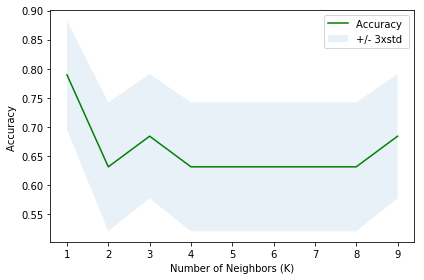

The best accuracy was with 0.7894736842105263 with k= 1


In [280]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [281]:
k = mean_acc.argmax()+1
#Train Model and Predict  
neigh_train = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_train = neigh_train.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_test, yhat_train))

Train set Accuracy:  0.7894736842105263


Decision Tree

In [282]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters
loanTree.fit(X_train,y_train)
predTree = loanTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7368421052631579


Support Vector Machine - rbf

In [283]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train) 
yhat_svm = clf.predict(X_test)

print("Avg F1-score: %.4f" % f1_score(y_test, yhat_svm, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat_svm))

Avg F1-score: 0.5974
Jaccard score: 0.6842


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine - linear

In [284]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat_svm2 = clf2.predict(X_test)

print("Avg F1-score: %.4f" % f1_score(y_test, yhat_svm2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat_svm2))

Avg F1-score: 1.0000
Jaccard score: 1.0000


Linear is the best kernel option for SVM

Logistic Regression - liblinear

In [285]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob))

LogLoss: : 0.58


Logistic Regression - Sag

In [286]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_lr2 = LR2.predict(X_test)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.54


Sag is slightly better than Liblinear Logistic logression 

<h1 align="center"><font size="5">Comparing algorithm performance</font></h1>

In [287]:
#K Nearest Neighbor(KNN)
knnf1 = f1_score(y_test, yhat_train, average='weighted')
knnjs = jaccard_similarity_score(y_test, yhat_train)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_train, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat_train))

Avg F1-score: 0.7624
Jaccard score: 0.7895


In [288]:
#Decision Tree
dtf1 = f1_score(y_test,predTree, average='weighted')
dtjs = jaccard_similarity_score(y_test, predTree)
print("Avg F1-score: %.4f" % f1_score(y_test,predTree, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, predTree))

Avg F1-score: 0.7320
Jaccard score: 0.7368


In [289]:
#Support Vector Machine
#yhat_svm_test = clf.predict(X_test)
svmf1 = f1_score(y_test, yhat_svm, average='weighted')
svmjs = jaccard_similarity_score(y_test, yhat_svm)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_svm, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat_svm))

Avg F1-score: 0.5974
Jaccard score: 0.6842


In [290]:
#Logistic Regression
#yhat_lr2_test = LR2.predict(X_test)
#yhat_prob2_test = LR2.predict_proba(X_test)
lrll = log_loss(y_test, yhat_prob2)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))
lrf1 = f1_score(y_test, yhat_lr2, average='weighted')
lrjs = jaccard_similarity_score(y_test, yhat_lr2)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_lr2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat_lr2))

LogLoss: : 0.54
Avg F1-score: 0.5974
Jaccard score: 0.6842


In [291]:
Accuracy = {'Algorithm': ['KNN','Decision Tree','SVM','LogLoss'],
        'Jaccard': [knnjs,dtjs,svmjs,lrjs],
            '1-score': [knnf1,dtf1,svmf1,lrf1],
            'LogLoss': ['NA','NA','NA',lrll]
        }

Accuracy_df = DataFrame(Accuracy, columns= ['Algorithm', 'Jaccard','1-score','LogLoss'])
Accuracy_df = Accuracy_df.round(2)
print (Accuracy_df)

       Algorithm  Jaccard  1-score   LogLoss
0            KNN     0.79     0.76        NA
1  Decision Tree     0.74     0.73        NA
2            SVM     0.68     0.60        NA
3        LogLoss     0.68     0.60  0.535326


The two most successful alogrithms identifying venue are KNN and Decision Tree

<h1 align="center"><font size="5">Compare the performace of the 2 best algorithms against the full data set</font></h1>

In [304]:
k = 3
#neigh = KNeighborsClassifier(n_neighbors = k).fit(X,y)
yhat = neigh_train.predict(X)
print("Accuracy: ", metrics.accuracy_score(y, yhat))

Accuracy:  0.9574468085106383


In [305]:
#Decision Tree
predTree = loanTree.predict(X)

dtf1 = f1_score(y,predTree, average='weighted')
dtjs = jaccard_similarity_score(y, predTree)
print("Avg F1-score: %.4f" % f1_score(y,predTree, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y, predTree))
print("Accuracy: ", metrics.accuracy_score(y, predTree))

Avg F1-score: 0.8906
Jaccard score: 0.8936
Accuracy:  0.8936170212765957


In [306]:
#Confusion Matrix - KNN
tn1, fp1, fn1, tp1 = confusion_matrix(y, yhat,).ravel()
(tn1, fp1, fn1, tp1)

(62, 0, 4, 28)

In [307]:
#Confusion Matrix - Decision Tree
tn2, fp2, fn2, tp2 = confusion_matrix(y, predTree,).ravel()
(tn2, fp2, fn2, tp2)

(60, 2, 8, 24)

In [308]:
#statistical measures - KNN
Total = (tn1+fp1+fn1+tp1)
#Accuracy: (FP+FN)/total
acc1 = ((tp1+tn1)/Total)
#Misclassification Rate:(FP+FN)/total
miss1 = (fp1+fn1)/Total
#True Positive Rate: TP/actual yes
tpr1 = (tp1/(tp1+fn1))
#False Positive Rate: FP/actual no
fpr1 = (fp1/(tn1+fp1))
#True Negative Rate: TN/actual no
tnr1 = (tn1/(tn1+fp1))
#False Negative Rate: TP/predicted yes
fn1 = (fn1/(fn1+tp1))

In [309]:
#statistical measures - Decision Tree
Total = (tn2+fp2+fn2+tp2)
#Accuracy: (FP+FN)/total
acc2 = ((tp2+tn2)/Total)
#Misclassification Rate:(FP+FN)/total
miss2 = (fp2+fn2)/Total
#True Positive Rate: TP/actual yes
tpr2 = (tp2/(tp2+fn2))
#False Positive Rate: FP/actual no
fpr2 = (fp2/(tn2+fp2))
#True Negative Rate: TN/actual no
tnr2 = (tn2/(tn2+fp2))
#False Negative Rate: TP/predicted yes
fn2 = (fn2/(fn2+tp2))

In [310]:
Accuracy2 = {'Algorithm': ['Accuracy','Misclassification','Sensitivity','False Positive Rate','Specificity','False Positive Rate'],
        'KNN': [acc1,miss1,tpr1,fpr1,tnr1,fpr1],
            'Decision Tree': [acc2,miss2,tpr2,fpr2,tnr2,fpr2]
        }

Accuracy2_df = DataFrame(Accuracy2, columns= ['Algorithm', 'KNN','Decision Tree'])
Accuracy2_df = Accuracy2_df.round(2)
print (Accuracy2_df)

             Algorithm   KNN  Decision Tree
0             Accuracy  0.96           0.89
1    Misclassification  0.04           0.11
2          Sensitivity  0.88           0.75
3  False Positive Rate  0.00           0.03
4          Specificity  1.00           0.97
5  False Positive Rate  0.00           0.03
